In [ ]:
from google.colab import drive
import keras,os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/DeepLearning/

/content/gdrive/MyDrive/DeepLearning


In [ ]:
%ls

mobil_x_motor.zip  test/  train/  vgg16.h5


In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 1199 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
from PIL import Image
import os

# Mendapatkan daftar file dari direktori gambar
image_dir = 'train/mobil'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'train/motor'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'test/mobil'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'test/motor'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

In [ ]:
model = tf.keras.Sequential([
    
    layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Flatten(),

    layers.Dense(units=4096, activation="relu"),
    layers.Dense(units=4096, activation="relu"),
    layers.Dense(units=2, activation="softmax")
])

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16.h5",monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=False, save_freq='epoch') # simpan setiap epoch
early = EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20,verbose=1)

In [ ]:
history = model.fit(traindata, steps_per_epoch=10, validation_data=testdata, validation_steps=10, epochs=50, callbacks=[checkpoint, early])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 941.4526 - accuracy: 0.4531 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to vgg16.h5
10/10 [==============================] - 49s 4s/step - loss: 941.4526 - accuracy: 0.4531 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.7284 - accuracy: 0.5469
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 5s 544ms/step - loss: 0.7284 - accuracy: 0.5469 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4969
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 6s 611ms/step - loss: 0.6939 - accuracy: 0.4969 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.5375
Epoch 4: val_accuracy did not improve from 0.500

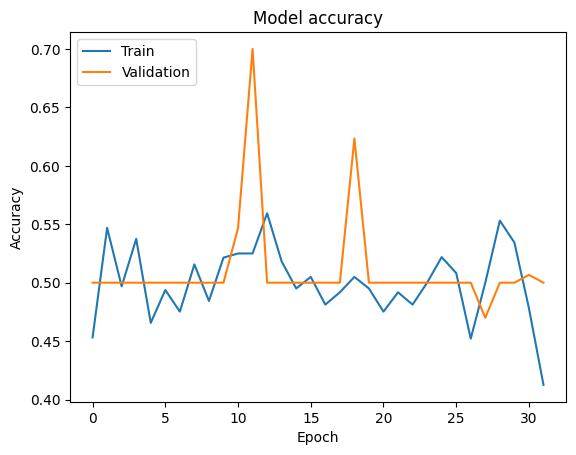

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()